#Assignment 2: Date Fruit Classification
## COMP-3704 (241552) Neural Networks and Deep Learning

###Brandon, Santiago

In [109]:
# Importting libraries
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import sklearn.metrics as skm
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from pprint import pprint as pp

In [110]:
# Importing data
df = pd.read_csv('/content/Date_Fruit_Datasets.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [111]:
# Displaying data statistics
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


These features represent the 34 subfeatures of the main three features, which are Morphological features, Shape features, and Colour features.

The subfeatures of Morphological features are:

Area,	Equivalent diameter, Perimeter,	Solidity, Major axis,	Convex_area, Minor axis,	Extent, Eccentricity,	Aspect ratio, Roundness, Compactness

The subfeatures of Shape features are:

Shapefactor_1, Shapefactor_3, Shapefactor_2, Shapefactor_4,

The subfeatures of Colours features are:

Mean RR, Mean RG, Mean RR,
Std. dev RR, Std. dev RG, Std. dev RR,
Skew RR,	Skew RG, Skew RR,
Kurtosis RR, Kurtosis RG, Kurtosis RR,
Entropy RR, Entropy RG,	Entropy RR,
All Daub4 RR,	All Daub4 RG,	All Daub4 RR

In [132]:
# Displayng data types and nan count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [113]:
# Counting duplicates
duplicates = df.duplicated()
dupe_count = duplicates.sum()
print('There are', dupe_count, 'duplicates')

# Dropping duplicates
df.drop_duplicates(inplace=True)

There are 0 duplicates


There were no missing values in any of the columns.

There also appeared to be no duplicated values.

We dropped duplicated values anyways just incase

Text(0.5, 1.0, 'Elements in each category')

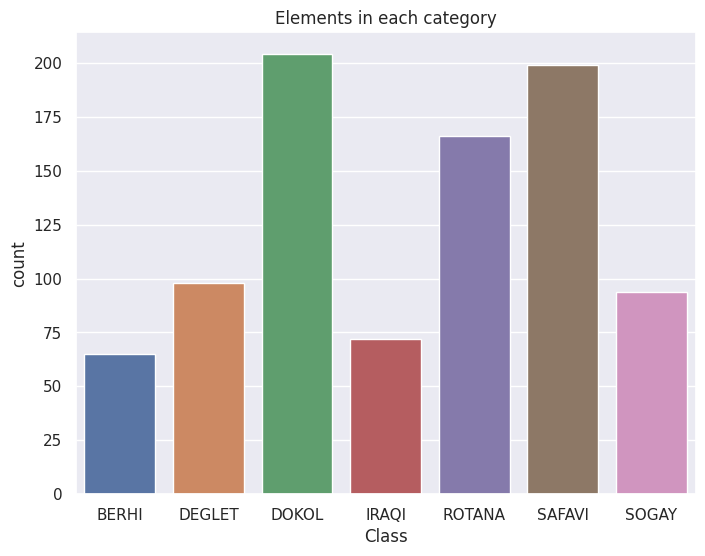

In [114]:
# Plotting elements in each category
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.countplot(data=df, x='Class')
plt.title('Elements in each category')

The data set is fairly balanced, however three columns stand out the most when commpared to the others. As they have many more counts in them than the others, this may effect the model.

In [115]:
# Splitting data into labels and features
labels = df[['Class']]
features = df.drop(columns='Class')

In [116]:
# Scaling data
scaler = mms()
features = scaler.fit_transform(features)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
# Reshaping labels into 2D array
labels = np.reshape(labels, (-1, 1))

In [118]:
# Splitting data into train test validation split
x_train, x_remaining, y_train, y_remaining = tts(features, labels, test_size = 0.3, random_state=42)

x_test, x_val, y_test, y_val = tts(x_remaining, y_remaining, test_size = 0.5, random_state=42)

## 2 Modeling

### Model 1

In [119]:
# Creating first model
model_1 = tf.keras.Sequential()

# Input layer
model_1.add(tf.keras.Input(shape=34))

# Hidden layers
model_1.add(tf.keras.layers.Dense(50, activation='relu'))
model_1.add(tf.keras.layers.Dense(100, activation='tanh'))

# Output layer
model_1.add(tf.keras.layers.Dense(7, activation='softmax'))

# Loss funciton for compiler
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimizer for Compiler
optimizer = tf.keras.optimizers.Adam()

# Compiler
model_1.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Fitting training data and running 100 epochs
model_1.fit(x_train, y_train, epochs = 100
          , verbose = 1, validation_data = (x_test,y_test))

# Displaying model summary
model_1.summary()

Epoch 1/100
20/20 [==============================] - 3s 29ms/step - loss: 1.7311 - accuracy: 0.4140 - val_loss: 1.4951 - val_accuracy: 0.5259
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 1.4145 - accuracy: 0.6067 - val_loss: 1.1620 - val_accuracy: 0.6815
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 1.1423 - accuracy: 0.6290 - val_loss: 0.9635 - val_accuracy: 0.6963
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.9351 - accuracy: 0.6815 - val_loss: 0.7913 - val_accuracy: 0.7259
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7988 - accuracy: 0.6911 - val_loss: 0.7020 - val_accuracy: 0.7926
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6894 - accuracy: 0.7564 - val_loss: 0.5944 - val_accuracy: 0.8000
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6214 - accuracy: 0.7850 - val_loss: 0.5444 - val_accuracy: 0.8444
Epoch 8/

This model was the first attempt at creating a model
So it uses 1 input layer, the fist hidden layer with 50 neurons and relu activation functions
The second hidden layer uses 100 nuerons and tanh activation
The output layer has 7 neurons and uses the softmax activation function.
It uses the Adam optimzer and SparseCategoricalCrossentropy loss

Loss on training set: 0.16887956857681274 
Accuracy on training set: 0.9426751732826233 



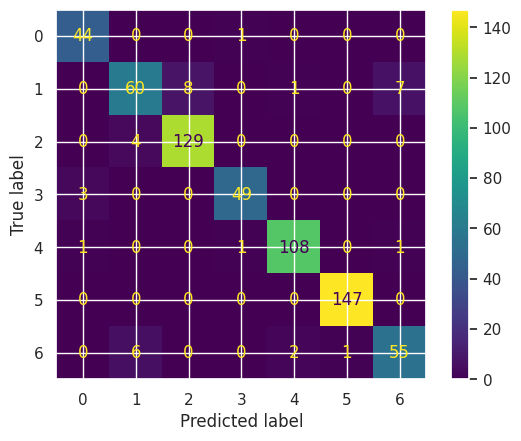

In [120]:
# Seperating loss and accuracy into individual variables
train_loss_m1, train_acc_m1 = model_1.evaluate(x_train, y_train, verbose=0)

# Predicting training data for confusion matrix
predict_m1 = np.argmax(model_1.predict(x_train, verbose=0), axis=1)

# Creating confusion matrix
cm_m1 = confusion_matrix(predict_m1, y_train)

print('This model was the first attempt at creating a model'
      + '\nSo it uses 1 input layer, the fist hidden layer with 50 neurons and relu activation functions\n'
      + 'The second hidden layer uses 100 nuerons and tanh activation\n'
      + 'The output layer has 7 neurons and uses the softmax activation function.\n'
      + 'It uses the Adam optimzer and SparseCategoricalCrossentropy loss\n')

# Printing loss and accuracy
print('Loss on training set:', train_loss_m1
      ,'\nAccuracy on training set:', train_acc_m1, '\n')

# Plotting confusion matrix
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_m1)
disp_1.plot()

### Model 2

In [121]:
# Creating second matrix
model_2 = tf.keras.Sequential()

# Input layer
model_2.add(tf.keras.Input(shape=34))

# Hidden layers
model_2.add(tf.keras.layers.Dense(40, activation='relu'))
model_2.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model_2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model_2.add(tf.keras.layers.Dense(130, activation='relu'))

# Output layers
model_2.add(tf.keras.layers.Dense(7, activation='softmax'))

# Loss funciton for compiler
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimizer for compiler
optimizer = tf.keras.optimizers.Lion()

# Compiling model
model_2.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Fitting training data and running 100 epochs
model_2.fit(x_train, y_train, epochs = 100
          , verbose = 1, validation_data = (x_test,y_test))

# Displaying model summary
model_2.summary()

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 1.9917 - accuracy: 0.2357 - val_loss: 1.9530 - val_accuracy: 0.2296
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.9020 - accuracy: 0.2357 - val_loss: 1.8535 - val_accuracy: 0.2296
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8645 - accuracy: 0.2452 - val_loss: 1.8089 - val_accuracy: 0.2741
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.8679 - accuracy: 0.2182 - val_loss: 1.8032 - val_accuracy: 0.2741
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8753 - accuracy: 0.2182 - val_loss: 1.7924 - val_accuracy: 0.2741
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 1.8611 - accuracy: 0.2468 - val_loss: 1.7918 - val_accuracy: 0.2296
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 1.8526 - accuracy: 0.2357 - val_loss: 1.8024 - val_accuracy: 0.2296
Epoch 8/100


This model was made with the idea of adding more layers and trying multiple activation
The fist hidden layer with 40 neurons and relu activation functions
The second hidden layer uses 50 nuerons and sigmoid activation
The third hidden layer uses 100 nuerons and sigmoid activation
The fourth hidden layer uses 130 nuerons and relu activation
The output layer has 7 neurons and uses the softmax activation function.
It makes use of the Lion optimzer and SparseCategoricalCrossentropy for loss once again

Loss on training set: 0.6269387602806091 
Accuracy on training set: 0.7420381903648376 



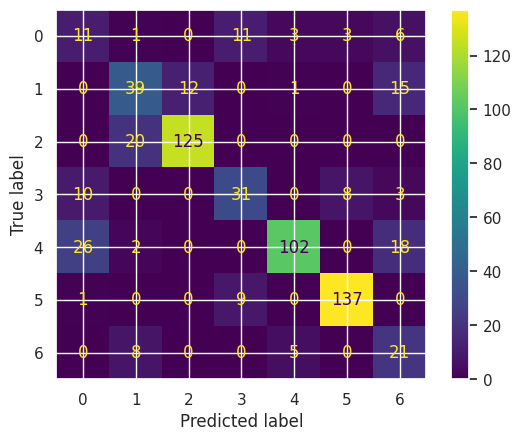

In [122]:
# Seperating loss and accuracy into individual variables
train_loss_m2, train_acc_m2 = model_2.evaluate(x_train, y_train, verbose=0)

# Predicting training data for confusion matrix
predict_m2 = np.argmax(model_2.predict(x_train, verbose=0), axis=1)
cm_m2 = confusion_matrix(predict_m2, y_train)

print('This model was made with the idea of adding more layers and trying multiple activation\n'
      + 'The fist hidden layer with 40 neurons and relu activation functions\n'
      + 'The second hidden layer uses 50 nuerons and sigmoid activation\n'
      + 'The third hidden layer uses 100 nuerons and sigmoid activation\n'
      + 'The fourth hidden layer uses 130 nuerons and relu activation\n'
      + 'The output layer has 7 neurons and uses the softmax activation function.\n'
      + 'It makes use of the Lion optimzer and SparseCategoricalCrossentropy for loss once again\n')

# Creating confusion matrix
print('Loss on training set:', train_loss_m2
      ,'\nAccuracy on training set:', train_acc_m2, '\n')

# Plotting confusion matrix
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_m2)
disp_2.plot()

### Model 3

In [123]:
# Creating model 3
model_3 = tf.keras.Sequential()

# Input layer
model_3.add(tf.keras.Input(shape=34))

# Hidden layers
model_3.add(tf.keras.layers.Dense(20, activation='sigmoid'))
model_3.add(tf.keras.layers.Dense(40, activation='relu'))
model_3.add(tf.keras.layers.Dense(70, activation='sigmoid'))

# Output layer
model_3.add(tf.keras.layers.Dense(7, activation='softmax'))


# Loss function for compiler
loss = tf.keras.losses.Poisson()

# Optimzer for compiler
optimizer = tf.keras.optimizers.Adam()

# Complining model
model_3.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Fitting training data and running it for 100 epochs
model_3.fit(x_train, y_train, epochs = 100
          , verbose = 1, validation_data = (x_test,y_test))

# Displaying model summary
model_3.summary()

Epoch 1/100
20/20 [==============================] - 2s 15ms/step - loss: 6.9526 - accuracy: 0.0812 - val_loss: 6.6911 - val_accuracy: 0.0593
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 6.5415 - accuracy: 0.0860 - val_loss: 6.6392 - val_accuracy: 0.0667
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 6.5272 - accuracy: 0.1720 - val_loss: 6.6299 - val_accuracy: 0.2741
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 6.5233 - accuracy: 0.1146 - val_loss: 6.6294 - val_accuracy: 0.0593
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 6.5229 - accuracy: 0.1338 - val_loss: 6.6293 - val_accuracy: 0.2741
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 6.5229 - accuracy: 0.2213 - val_loss: 6.6293 - val_accuracy: 0.1926
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 6.5229 - accuracy: 0.2070 - val_loss: 6.6293 - val_accuracy: 0.2815
Epoch 8/100


This model was made with the idea of using a different loss function
The fist hidden layer with 20 neurons and sigmoid activation functions
The second hidden layer uses 40 nuerons and relu activation
The third hidden layer uses 70 nuerons and sigmoid activation
The output layer has 7 neurons and uses the softmax activation function.
It makes use of the adam optimzer and Poisson for loss once again

Loss on training set: 6.522844314575195 
Accuracy on training set: 0.09872611612081528 



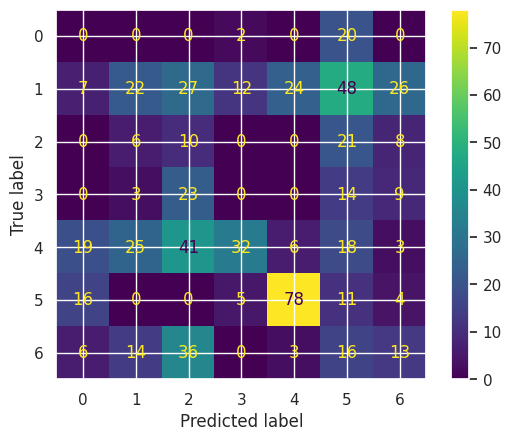

In [124]:
# Seperating loss and accuracy into individual variables
train_loss_m3, train_acc_m3 = model_3.evaluate(x_train, y_train, verbose=0)

# Predicting training data for confusion matrix
predict_m3 = np.argmax(model_3.predict(x_train, verbose=0), axis=1)
cm_m3 = confusion_matrix(predict_m3, y_train)

print('This model was made with the idea of using a different loss function\n'
      + 'The fist hidden layer with 20 neurons and sigmoid activation functions\n'
      + 'The second hidden layer uses 40 nuerons and relu activation\n'
      + 'The third hidden layer uses 70 nuerons and sigmoid activation\n'
      + 'The output layer has 7 neurons and uses the softmax activation function.\n'
      + 'It makes use of the adam optimzer and Poisson for loss once again\n')

# Creating confusion matrix
print('Loss on training set:', train_loss_m3
      ,'\nAccuracy on training set:', train_acc_m3, '\n')

# Ploting confusion matrix
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_m3)
disp_3.plot()

### Model 4

In [125]:
# Creating model 4
model_4 = tf.keras.Sequential()

# Input layer
model_4.add(tf.keras.Input(shape=34))

# Hidden layers
model_4.add(tf.keras.layers.Dense(34, activation='sigmoid'))
model_4.add(tf.keras.layers.Dense(67, activation='tanh'))
model_4.add(tf.keras.layers.Dense(85, activation='sigmoid'))
model_4.add(tf.keras.layers.Dense(120, activation='relu'))
model_4.add(tf.keras.layers.Dense(40, activation='tanh'))
model_4.add(tf.keras.layers.Dense(185, activation='relu'))

# output layers
model_4.add(tf.keras.layers.Dense(7, activation='softmax'))

# Loss function for compiler
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimzer for compiler
optimizer = tf.keras.optimizers.Lion()

# Compling model
model_4.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Fitting data
model_4.fit(x_train, y_train, epochs = 100
          , verbose = 1, validation_data = (x_test,y_test))

# Displaying model summary
model_4.summary()

Epoch 1/100
20/20 [==============================] - 2s 16ms/step - loss: 1.9344 - accuracy: 0.2357 - val_loss: 1.8904 - val_accuracy: 0.2296
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8751 - accuracy: 0.2357 - val_loss: 1.8281 - val_accuracy: 0.2296
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8601 - accuracy: 0.2118 - val_loss: 1.8023 - val_accuracy: 0.2741
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8622 - accuracy: 0.2197 - val_loss: 1.7966 - val_accuracy: 0.3407
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 1.8588 - accuracy: 0.2484 - val_loss: 1.8011 - val_accuracy: 0.2296
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8553 - accuracy: 0.2357 - val_loss: 1.8090 - val_accuracy: 0.2296
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 1.8534 - accuracy: 0.2357 - val_loss: 1.8075 - val_accuracy: 0.2296
Epoch 8/100


This model was made with the idea of using many more nodes than necessary
The fist hidden layer with 34 neurons and sigmoid activation functions
The second hidden layer uses 67 nuerons and tanh activation
The third hidden layer uses 85 nuerons and sigmoid activation
The fourth hidden layer with 120 neurons and relu activation functions
The fifth hidden layer uses 40 nuerons and tanh activation
The sixth hidden layer uses 185 nuerons and sigmoid activation
The output layer has 7 neurons and uses the softmax activation function.
It makes use of the Lion optimzer and SparseCategoricalCrossentropy for loss

Loss on training set: 0.3193982243537903 
Accuracy on training set: 0.8742038011550903 



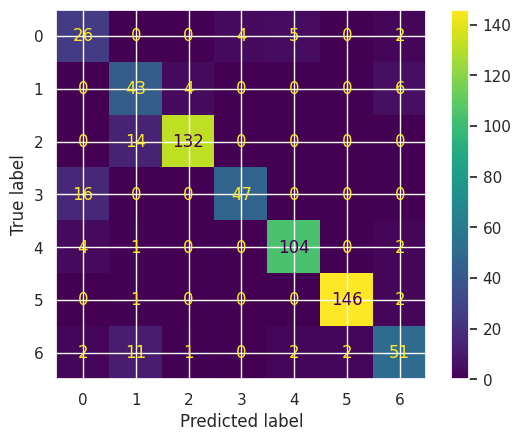

In [126]:
train_loss_m4, train_acc_m4 = model_4.evaluate(x_train, y_train, verbose=0)

predict_m4 = np.argmax(model_4.predict(x_train, verbose=0), axis=1)
cm_m4 = confusion_matrix(predict_m4, y_train)

print('This model was made with the idea of using many more nodes than necessary\n'
      + 'The fist hidden layer with 34 neurons and sigmoid activation functions\n'
      + 'The second hidden layer uses 67 nuerons and tanh activation\n'
      + 'The third hidden layer uses 85 nuerons and sigmoid activation\n'
      + 'The fourth hidden layer with 120 neurons and relu activation functions\n'
      + 'The fifth hidden layer uses 40 nuerons and tanh activation\n'
      + 'The sixth hidden layer uses 185 nuerons and sigmoid activation\n'
      + 'The output layer has 7 neurons and uses the softmax activation function.\n'
      + 'It makes use of the Lion optimzer and SparseCategoricalCrossentropy for loss\n')


print('Loss on training set:', train_loss_m4
      ,'\nAccuracy on training set:', train_acc_m4, '\n')

disp_4 = ConfusionMatrixDisplay(confusion_matrix=cm_m4)
disp_4.plot()

### Model 5

In [127]:
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.Input(shape=34))
model_5.add(tf.keras.layers.Dense(20, activation='tanh'))
model_5.add(tf.keras.layers.Dense(40, activation='tanh'))
model_5.add(tf.keras.layers.Dense(40, activation='relu'))
model_5.add(tf.keras.layers.Dense(7, activation='softmax'))

loss = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Lion()

model_5.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

model_5.fit(x_train, y_train, epochs = 100
          , verbose = 1, validation_data = (x_test,y_test))

model_5.summary()

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 1.9837 - accuracy: 0.1672 - val_loss: 1.9491 - val_accuracy: 0.1926
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.9244 - accuracy: 0.1720 - val_loss: 1.8919 - val_accuracy: 0.1926
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8819 - accuracy: 0.1815 - val_loss: 1.8478 - val_accuracy: 0.2889
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 1.8476 - accuracy: 0.3424 - val_loss: 1.8106 - val_accuracy: 0.4074
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 1.8172 - accuracy: 0.4092 - val_loss: 1.7788 - val_accuracy: 0.4148
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 1.7931 - accuracy: 0.4092 - val_loss: 1.7507 - val_accuracy: 0.4296
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 1.7727 - accuracy: 0.4188 - val_loss: 1.7241 - val_accuracy: 0.4296
Epoch 8/100


This we just wanted to try having two hidden layers with the same amount of neurons
The fist hidden layer with 20 neurons and tanh activation functions
The second hidden layer uses 40 nuerons and tanh activation
The third hidden layer uses 40 nuerons and relu activation
It makes use of the Lion optimzer and SparseCategoricalCrossentropy for loss

Loss on training set: 0.32779258489608765 
Accuracy on training set: 0.8773885369300842 



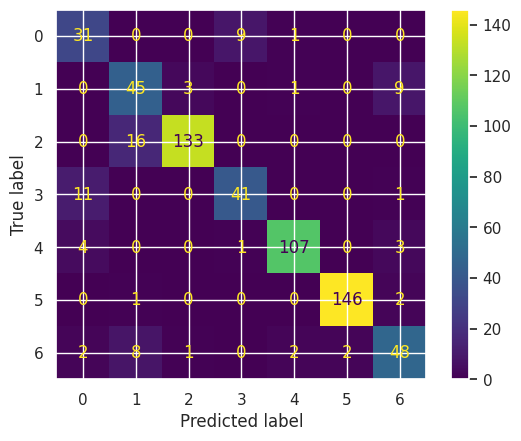

In [128]:
train_loss_m5, train_acc_m5 = model_5.evaluate(x_train, y_train, verbose=0)

predict_m5 = np.argmax(model_5.predict(x_train, verbose=0), axis=1)
cm_m5 = confusion_matrix(predict_m5, y_train)

print('This we just wanted to try having two hidden layers with the same amount of neurons\n'
      + 'The fist hidden layer with 20 neurons and tanh activation functions\n'
      + 'The second hidden layer uses 40 nuerons and tanh activation\n'
      + 'The third hidden layer uses 40 nuerons and relu activation\n'
      + 'It makes use of the Lion optimzer and SparseCategoricalCrossentropy for loss\n')

print('Loss on training set:', train_loss_m5
      ,'\nAccuracy on training set:', train_acc_m5, '\n')

disp_5 = ConfusionMatrixDisplay(confusion_matrix=cm_m5)
disp_5.plot()

## 3 Conclusion

Model 1 appears to be the best of the 5 models created. On the training data it is the only model to get over 90% accuracy, it had 94.27%. The next closest is model 5 with 87.74% accuracy on the training set.

Model 1 also had the lowest loss (0.16887956857681274), with the next closest being model 4 with a loss of 0.3193982243537903,

In [129]:
# Creating best model
model_1 = tf.keras.Sequential()

# Input layer
model_1.add(tf.keras.Input(shape=34))

# Hidden layes
model_1.add(tf.keras.layers.Dense(50, activation='relu'))
model_1.add(tf.keras.layers.Dense(100, activation='tanh'))

# Outpput layers
model_1.add(tf.keras.layers.Dense(7, activation='softmax'))

# Loss function for compiler
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimizer for compiler
optimizer = tf.keras.optimizers.Adam()

# compiling model
model_1.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Fitting model, training for 100 epochs
# set verbose to 0 to hide fit information
model_1.fit(x_train, y_train, epochs = 100
          , verbose = 0, validation_data = (x_test,y_test))

# Displaiynf model summary
model_1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 20)                700       
                                                                 
 dense_133 (Dense)           (None, 40)                840       
                                                                 
 dense_134 (Dense)           (None, 40)                1640      
                                                                 
 dense_135 (Dense)           (None, 7)                 287       
                                                                 
Total params: 3467 (13.54 KB)
Trainable params: 3467 (13.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Loss on testing set: 0.20895464718341827 
Accuracy on testing set: 0.9259259104728699 

Loss on validation set: 0.21999715268611908 
Accuracy on validation set: 0.9111111164093018 



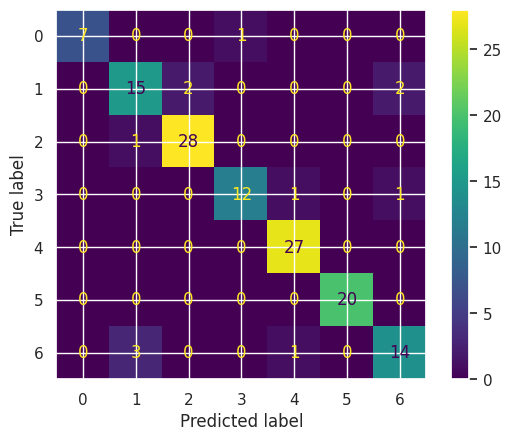

In [135]:
# Saving accuracy and loss for testing set
test_loss_m1, test_acc_m1 = model_1.evaluate(x_test, y_test, verbose=0)

# Saving accuracy and loss for validation set
val_loss_m1, val_acc_m1 = model_1.evaluate(x_val, y_val, verbose=0)

# Creating confusion matrix
predict_m1 = np.argmax(model_1.predict(x_val, verbose=0), axis=1)
cm_m1 = confusion_matrix(predict_m1, y_val)

# Displaying loss and accuracy
print('Loss on testing set:', test_loss_m1
      ,'\nAccuracy on testing set:', test_acc_m1
      ,'\n\nLoss on validation set:', val_loss_m1
      ,'\nAccuracy on validation set:', val_acc_m1, '\n')

# Printing out plot
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_m1)
disp_1.plot()

Model 1 performed fairly well, with accuracy on validation and testing data both being from 91-92. The loss on both sets has also stayed low with it being around 0.21 on both.

Looking at the confusion matrix, the model only had 5 false positives and 7 false negatives
